#HW 1 - Image Manipulation (10 pts)
---
By completing this homework assignment, you will implement image brightness and domain manipulations, and understand the differences between forward mapping and backward mapping.


In [1]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

Load image and display it. Feel free to load any image you want, but remember to submit your image if you don't use the image that comes with the assignment.

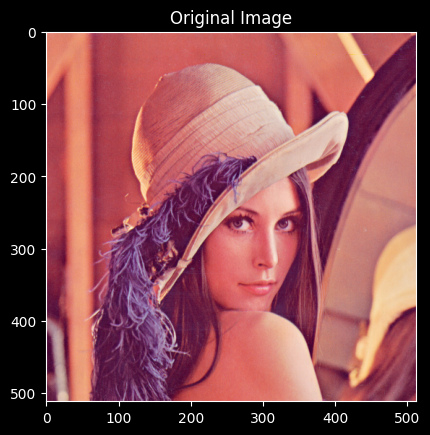

In [2]:
img = np.array(Image.open("Lenna.png").convert("RGB"))
plt.imshow(img)
plt.title("Original Image")
plt.show()

###Task 1 (2 pts)

Implement a function to adjust brightness of all the pixels in the image. Use the function to brighten and darken the original image, and display the brightened and darkened images. (value=20 and value=-20 are just representative values, you can use any value you want to show visible brightness change)

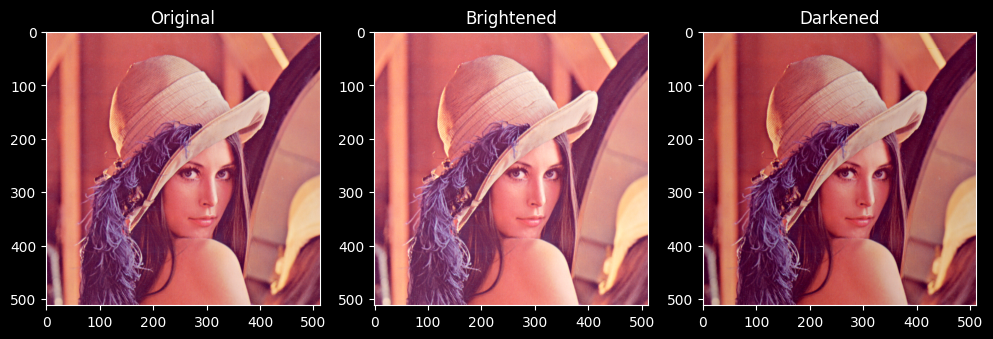

In [3]:
def adjust_brightness(img, value):
    tmp = img.astype(np.int32)
    tmp += value
    return np.clip(tmp, 0, 255).astype(np.uint8)
  

bright_img = adjust_brightness(img, value=20)
dark_img = adjust_brightness(img, value=-20)

#display original, brightened and darkened images
#feel free to edit this section if you want
plt.figure(figsize=(12,4))

plt.subplot(1,3,1)
plt.imshow(img)
plt.title("Original")

plt.subplot(1,3,2)
plt.imshow(bright_img)
plt.title("Brightened")

plt.subplot(1,3,3)
plt.imshow(dark_img)
plt.title("Darkened")

plt.show()

###Task 2 (2 pts)

In this task, you will implement image cropping using direct matrix slicing. Crop out and display a rectangular region that contains the eyes, nose, and mouth. You must implement cropping using NumPy array slicing. For example, cropped = img[y0:y1, x0:x1]

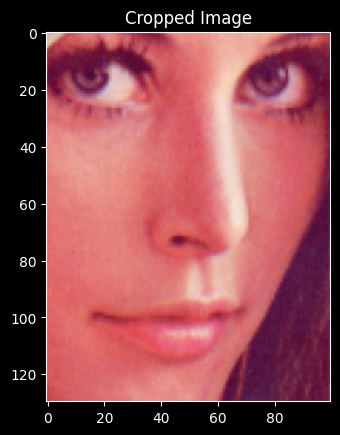

In [4]:
# insert your code here
def crop_picture(img):
    return img[250:380,250:350]

plt.imshow(crop_picture(img))
plt.title("Cropped Image")
plt.show()

###Task 3 (2 pts)

Implement 2D transformation functions: translation, rotation, scaling, shear, mirror

In [5]:
# implement translation, rotation, scaling, shear, mirror here
def translation(tx, ty):
    return np.array([
        [1, 0, tx],
        [0, 1, ty],
        [0, 0, 1]
    ])

def rotation(deg):
    ang =  np.deg2rad(deg)
    return np.array([
        [np.cos(ang), -np.sin(ang), 0],
        [np.sin(ang), np.cos(ang), 0],
        [0, 0, 1]
    ])

def scaling(sx,sy):
    return np.array([
        [sx, 0, 0],
        [0, sy, 0],
        [0, 0, 1]
    ])

def shear(shx,shy):
    return np.array([
        [1, shx, 0],
        [shy, 1, 0],
        [0, 0, 1]
    ])

def mirror(deg):
    ang =  np.deg2rad(deg)
    return np.array([
        [np.cos(2*ang), -np.sin(2*ang), 0],
        [np.sin(2*ang), np.cos(2*ang), 0],
        [0, 0, 1]
    ])


###Task 4 (2 pts) Image Warping

Implement forward mapping and backward mapping. (T_inv is $T^{-1}$)

In [6]:
def warp_forward(img, T):
    H, W, C = img.shape
    out = np.zeros_like(img)
    for x in range(W):
        for y in range(H):
            dst = T @ np.array([x,y,1])
            xd = int(round(dst[0]))
            yd = int(round(dst[1]))
            if 0 <= xd < W and 0 <= yd < H:
                out[yd,xd] = img[y,x]
    return out

def warp_backward(img, T):
    
    out = np.zeros_like(img)
    H, W, C = out.shape
    T_inv = np.linalg.inv(T)
    for x in range(W):
        for y in range(H):
            src = T_inv @ np.array([x,y,1])
            xs = int(round(src[0]))
            ys = int(round(src[1]))
            if 0 <= xs < W and 0 <= ys < H:
                out[y,x] = img[ys,xs]
    return out

You don't need to do anything here. center_transform(T, W, H) converts a transformation that acts around the origin (top-left corner in image coordinates) into one that acts around the image center. For example, a mirror transformation flips the image around the origin.

If the origin is at the top-left corner, most of the flipped image ends up outside the image domain. If your transformation implementation is correct, but you cannot see the result, try apply this centering transform, for example: T_mirror_centered = center_transform(T_mirror, W, H). T is a 2D homogeneous transformation matrix, W and H are the image width and height. You should check the results with using and not using center_transform()



In [7]:
def center_transform(T, W, H):
    return translation(W / 2, H / 2) @ T @ translation(-W / 2, -H / 2)

###Task 5 (2 pts)

Apply all five 2D transformations to the original image, and visualize the result with forward mapping and backward mapping separately.

Text(0.5, 1.0, 'mirror backward')

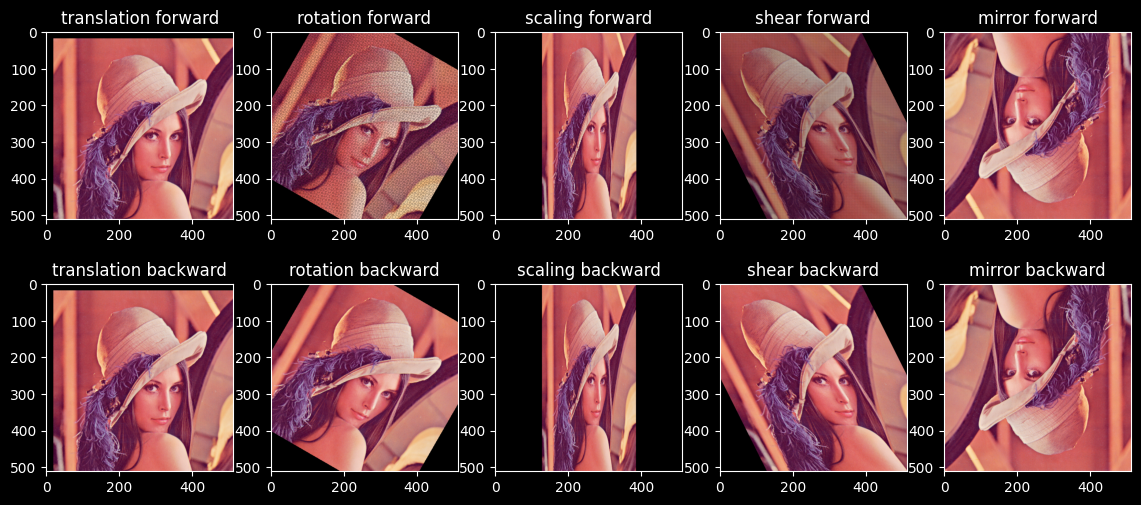

In [8]:
plt.figure(figsize=(14,6))

plt.subplot(2,5,1)
translation_img = warp_forward(img,translation(20,20))
plt.imshow(translation_img)
plt.title("translation forward")

plt.subplot(2,5,2)
rotation_img = warp_forward(img,center_transform(rotation(30),512,512))
plt.imshow(rotation_img)
plt.title("rotation forward")

plt.subplot(2,5,3)
scaling_img = warp_forward(img,center_transform(scaling(0.5,1),512,512))
plt.imshow(scaling_img)
plt.title("scaling forward")

plt.subplot(2,5,4)
shear_img = warp_forward(img,center_transform(shear(0.5,0),512,512))
plt.imshow(shear_img)
plt.title("shear forward")

plt.subplot(2,5,5)
mirror_img = warp_forward(img,center_transform(mirror(90),512,512))
plt.imshow(mirror_img)
plt.title("mirror forward")

plt.subplot(2,5,6)
plt.imshow(warp_backward(img,translation(20,20)))
plt.title("translation backward")

plt.subplot(2,5,7)
plt.imshow(warp_backward(img,center_transform(rotation(30),512,512)))
plt.title("rotation backward")

plt.subplot(2,5,8)
plt.imshow(warp_backward(img,center_transform(scaling(0.5,1),512,512)))
plt.title("scaling backward")

plt.subplot(2,5,9)
plt.imshow(warp_backward(img,center_transform(shear(0.5,0),512,512)))
plt.title("shear backward")

plt.subplot(2,5,10)
plt.imshow(warp_backward(img,center_transform(mirror(90),512,512)))
plt.title("mirror backward")


###Task 6 (1 bonus point)
Implement backward mapping with vectorized computation (applying operations on entire arrays without using explicit loops). Use it for all five 2D transformations and display the results.



In [9]:
#use np.vectorize somehow to do this
